# The spatial $\Lambda$-Viot-Fleming Process

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cProfile
from scipy.spatial import cKDTree
import time
from slfv import ball_update_allele_distr, rectangle_update_allele_distribution, improved_update_allele_distribution

setting up the parameters

In [2]:
dim = 2
length = 1
lambda_param = 0.1
no_alleles = 4
discretization_steps = 100
event_rate = 1

Initialization of the simulation

In [3]:
def initialization(T):
    # define a meshgrid on the area [0, length] ** dim. Every point in the meshgrid needs to hold no_alleles values
    allele_distr = 1 / no_alleles * np.ones((discretization_steps, discretization_steps, no_alleles))

    # simulate the centre of reproduction events
    z = np.random.uniform(0, length, (dim, T))

    # simulate the radius of reproduction events
    r = length / 30 * np.ones(T)

    # simulate the impact of reproduction events
    u = 0.01 * np.ones(T)
    
    return allele_distr, z, r, u

### Control: plot initial gene distribution & centers of reproduction events

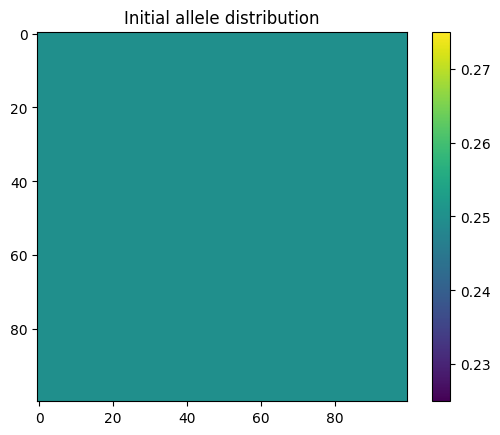

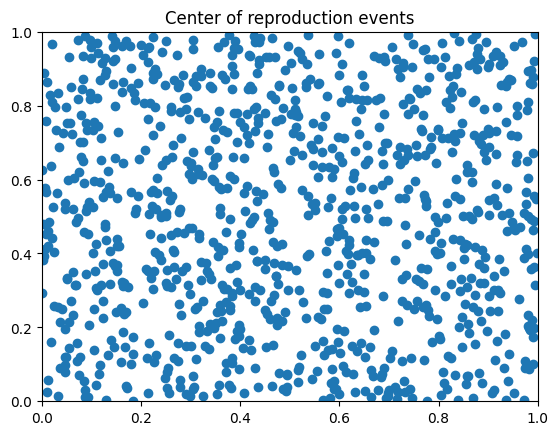

In [4]:
allele_distr, z, r, u = initialization(1000)

plt.title("Initial allele distribution")
plt.imshow(allele_distr[:, :, 0])
plt.colorbar()
plt.show()

plt.title("Center of reproduction events")
plt.scatter(z[0], z[1])
plt.xlim(0, length)
plt.ylim(0, length)
plt.show()

Lets start with the very basic algorithm, implemented in exactly the same straight-forward way as in the paper:

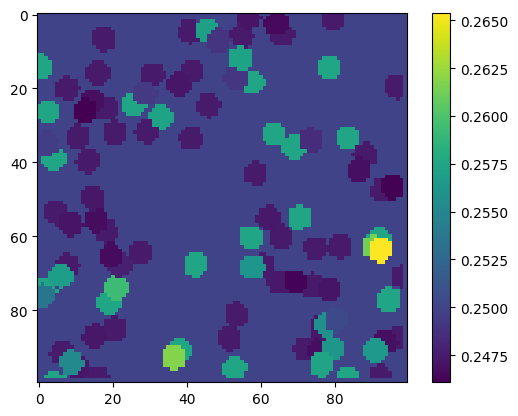

In [5]:
T = 10 ** 2
allele_distr, z, r, u = initialization(T)
ball_update_allele_distr(allele_distr, z, r, u, T, no_alleles, discretization_steps, length, True)

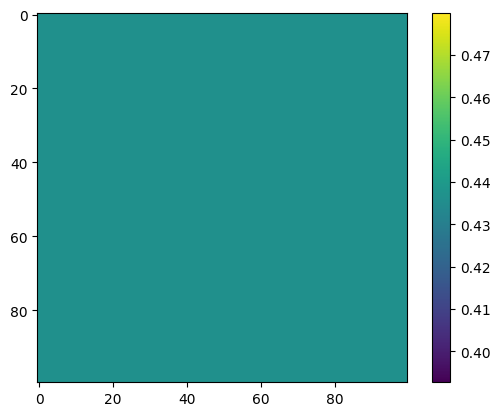

In [6]:
T = 10 ** 3
allele_distr, z, r, u = initialization(T)
rectangle_update_allele_distribution(allele_distr, z, r, u, T, no_alleles, discretization_steps, length, True)

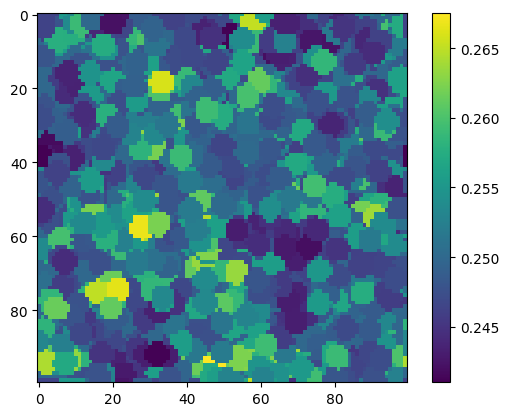

In [7]:
T = 10 ** 3
allele_distr, z, r, u = initialization(T)
improved_update_allele_distribution(allele_distr, z, r, u, T, no_alleles, discretization_steps, length, True)

Comparing both regular and improved algorithm in terms of runtime

In [8]:
regular = []
improved = []
rectangle = []

for n in range(2):
    T = 10 ** n
    
    allele_distr, z, r, u = initialization(T)
    # measure time
    start = time.time()
    ball_update_allele_distr(allele_distr, z, r, u, T, no_alleles, discretization_steps, length)
    end = time.time()
    regular.append(end-start)

    allele_distr, z, r, u = initialization(T)
    # measure time
    start = time.time()
    improved_update_allele_distribution(allele_distr, z, r, u, T, no_alleles, discretization_steps, length)
    end = time.time()
    improved.append(end-start)

    allele_distr, z, r, u = initialization(T)
    start = time.time()
    rectangle_update_allele_distribution(allele_distr, z, r, u, T, no_alleles, discretization_steps, length)
    end = time.time()
    rectangle.append(end-start)

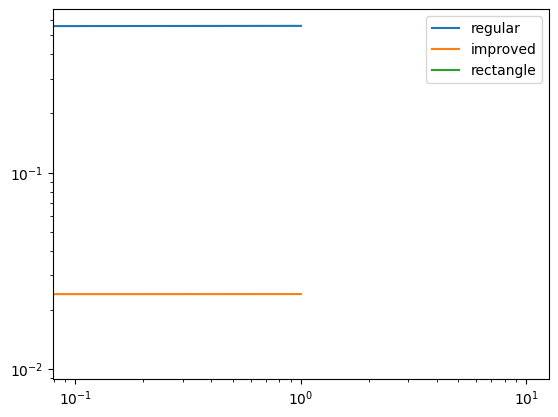

In [9]:
plt.plot(regular, label='regular')
plt.plot(improved, label='improved')
plt.plot(rectangle, label='rectangle')
plt.legend()
plt.loglog()
plt.show()

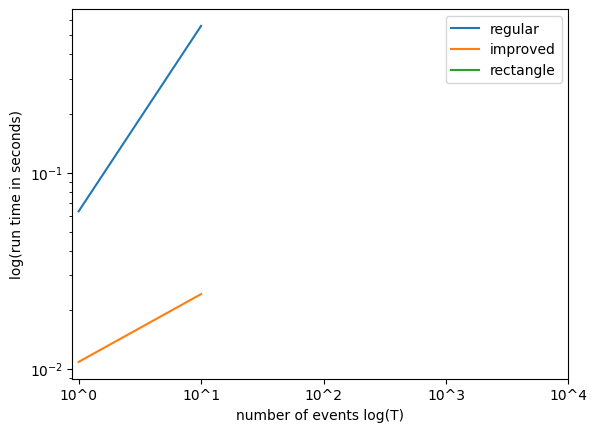

In [10]:
plt.plot(regular, label='regular')
plt.plot(improved, label='improved')
plt.plot(rectangle, label='rectangle')
plt.legend()
plt.yscale('log')
plt.xticks([0, 1, 2, 3, 4], ['10^0', '10^1', '10^2', '10^3', '10^4'])
plt.xlabel('number of events log(T)')
plt.ylabel('log(run time in seconds)')
plt.show()